## Improvements to make:

- negative binomial instead of poisson
- add season, player type, etc.

In [5]:
import arviz as az
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import pymc as pm
import pytensor.tensor as pt

import warnings

warnings.filterwarnings("ignore", category=UserWarning)

RANDOM_SEED = 42

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.10.3


In [6]:
import pandas as pd

df = pd.read_csv("bayesdata.csv")

In [7]:
df.head()

,player_id,game_id,date,points,3_pointers,rebounds,assists,steals,blocks,turnovers
0,1630173,22300432,"DEC 29, 2023",0,0,2,0,0,0,0
1,1630173,22300416,"DEC 27, 2023",3,0,1,0,1,1,1
2,1630173,22300395,"DEC 23, 2023",8,0,2,1,0,2,0
3,1630173,22300382,"DEC 22, 2023",4,0,6,1,2,0,1
4,1630173,22300369,"DEC 20, 2023",13,1,5,1,1,1,1


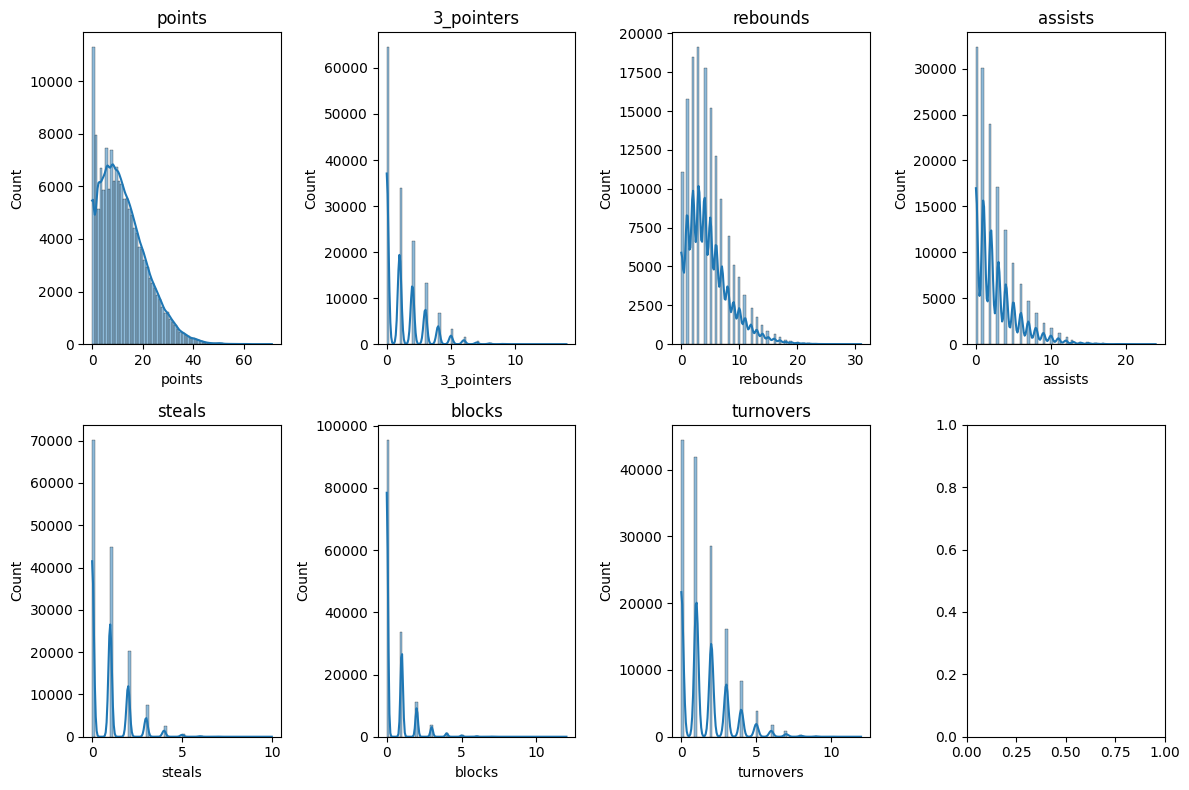

In [9]:
columns = [
    "points",
    "3_pointers",
    "rebounds",
    "assists",
    "steals",
    "blocks",
    "turnovers",
]

# Set up a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))

# Flatten the 2D array of subplots to a 1D array
axes = axes.flatten()

# Iterate through columns and create histograms
for i, column in enumerate(columns):
    sns.histplot(x=df[column], bins=70, ax=axes[i], kde=True)
    axes[i].set_title(column)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
points = df["points"].astype(int).values
coords = {"player": df.player_id.values}

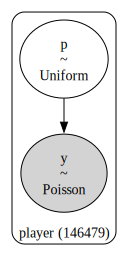

In [6]:
with pm.Model(coords=coords) as uninformative_prior_model:
    p = pm.Uniform("p", 0, 80, dims="player")

    y = pm.Poisson("y",  mu=p, observed=points, dims="player")

pm.model_to_graphviz(uninformative_prior_model)

In [7]:
with uninformative_prior_model:
    uninformed_prior_trace = pm.sample_prior_predictive(1000)

Sampling: [p, y]


<Axes: ylabel='Count'>

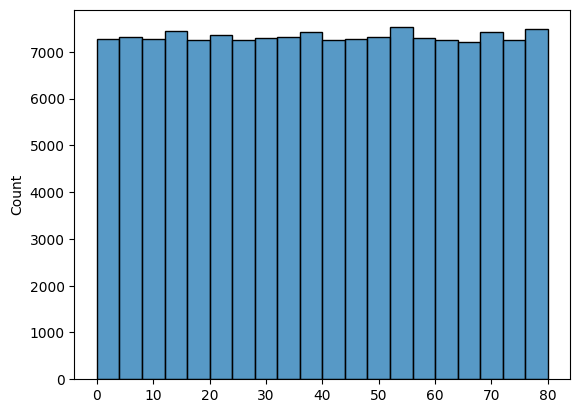

In [8]:
sns.histplot(
    uninformed_prior_trace.prior["p"].sel(chain=[0], draw=[0]).squeeze(), bins=20
)

In [ ]:
y_pred_g = pm.sample_posterior_predictive(
    trace_g, 100, model_g
)  # using the sampled mu/sigma values to make 100 counterfeit y's
data_ppc = az.from_pymc(trace=trace_g, posterior_predictive=y_pred_g)
ax = az.plot_ppc(data_ppc, figsize=(12, 6), mean=False)
ax[0].legend(fontsize=15)

This function will randomly draw 500 samples of parameters from the trace. Then, for each sample, it will draw 100 random numbers from a normal distribution specified by the values of mu and std in that sample.

ppc = pm.sample_ppc(trace, samples=500, model=model, size=100)

Now, ppc contains 500 generated data sets (containing 100 samples each), each using a different parameter setting from the posterior:


np.asarray(ppc['n']).shape

(500, 100)



In [ ]:
# TODO: Plot ppc vs real data